In [17]:
# import plotting libraries
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import seaborn as sns

In [18]:
def get_plots(exercise_no):
    # import csv files
    cpp_1000 = pd.read_csv("runs/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_1000x1000_C++.csv")
    java_1000 = pd.read_csv("runs/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_1000x1000_Java.csv")

    cpp_1800 = pd.read_csv("runs/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_1800x1800_C++.csv")
    java_1800 = pd.read_csv("runs/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_1800x1800_Java.csv")

    cpp_3000 = pd.read_csv("runs/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_3000x3000_C++.csv")
    java_3000 = pd.read_csv("runs/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_3000x3000_Java.csv")

    # append an index column to the dataframes
    cpp_1000['n'] = cpp_1000.index + 1
    java_1000['n'] = java_1000.index + 1

    cpp_1800['n'] = cpp_1800.index + 1
    java_1800['n'] = java_1800.index + 1

    cpp_3000['n'] = cpp_3000.index + 1
    java_3000['n'] = java_3000.index + 1

    # Replace the column names
    cpp_1000.columns = ['time', 'n']
    java_1000.columns = ['time', 'n']

    cpp_1800.columns = ['time', 'n']
    java_1800.columns = ['time', 'n']

    cpp_3000.columns = ['time', 'n']
    java_3000.columns = ['time', 'n']

    plt.plot(cpp_1000["n"], cpp_1000["time"], label="C++")
    plt.plot(java_1000["n"], java_1000["time"], label="Java")

    plt.xlabel("Iteration no.")
    plt.ylabel("time (s)")
    plt.title("1000x1000 matrix")
    plt.xticks(cpp_1000["n"])
    plt.legend()
    plt.savefig("plots/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_1000x1000.png", dpi=300)
    plt.show()

    plt.plot(cpp_1800["n"], cpp_1800["time"], label="C++")
    plt.plot(java_1800["n"], java_1800["time"], label="Java")

    plt.xlabel("Iteration no.")
    plt.ylabel("time (s)")
    plt.title("1800x1800 matrix")
    plt.xticks(cpp_1800["n"])
    plt.legend()
    plt.savefig("plots/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_1800x1800.png", dpi=300)
    plt.show()

    plt.plot(cpp_3000["n"], cpp_3000["time"], label="C++")
    plt.plot(java_3000["n"], java_3000["time"], label="Java")

    plt.xlabel("Iteration no.")
    plt.ylabel("time (s)")
    plt.title("3000x3000 matrix")
    plt.xticks(cpp_3000["n"])
    plt.legend()
    plt.savefig("plots/ex" + str(exercise_no) + "/ex" + str(exercise_no) + "_3000x3000.png", dpi=300)
    plt.show()
    

In [8]:
df = pd.read_csv("metrics/ex2/ex2-b.csv")

# drop second column
df = df.drop(df.columns[1], axis=1)

# rename second column to time
df.columns = ['Dimensions', 'Time']

df

,Dimensions,Time
0,4096,95.752
1,6144,160.030
2,8192,375.548
3,10240,753.836


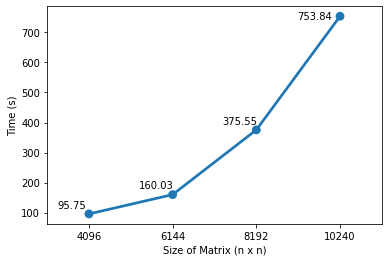

In [9]:
# create a plot whose y is the time and x is the dimensions
sns.pointplot(x="Dimensions", y="Time", data=df)
plt.ylabel("Time (s)")
plt.xlabel("Size of Matrix (n x n)")

# Display the actual values on the plot
for index, row in df.iterrows():
    if row.name == len(df)-1:
        plt.text(row.name-0.3, row.Time-10, round(row.Time, 2), color='black', ha="center")
    
    else:
        plt.text(row.name-0.2, row.Time+20, round(row.Time, 2), color='black', ha="center")


# save the plot
plt.savefig("plots/ex2/ex2_higher.png", dpi=300)

In [19]:
ex1 = pd.read_csv("metrics/ex1/ex1.csv")
ex2a = pd.read_csv("metrics/ex2/ex2-a.csv")
ex2b = pd.read_csv("metrics/ex2/ex2-b.csv")

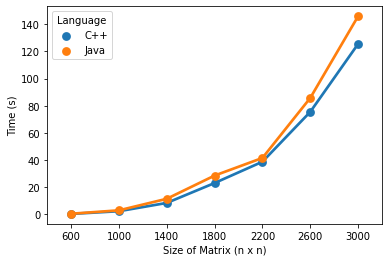

In [20]:
# display a plot of the time taken by the C++ and Java programs for the first exercise, by varying the size of the matrix
sns.pointplot(x="Dimensions", y="Time", hue="Language", data=ex1)
plt.ylabel("Time (s)")
plt.xlabel("Size of Matrix (n x n)")
plt.savefig("plots/ex1/ex1-overall.png", dpi=300)
plt.show()

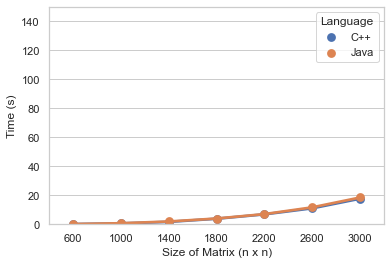

In [67]:
# display a plot of the time taken by the C++ and Java programs for the first exercise, by varying the size of the matrix
sns.pointplot(x="Dimensions", y="Time", hue="Language", data=ex2a)
plt.ylabel("Time (s)")
plt.xlabel("Size of Matrix (n x n)")
plt.ylim(0, 150)
plt.savefig("plots/ex2/ex2a-overall.png", dpi=300)
plt.show()

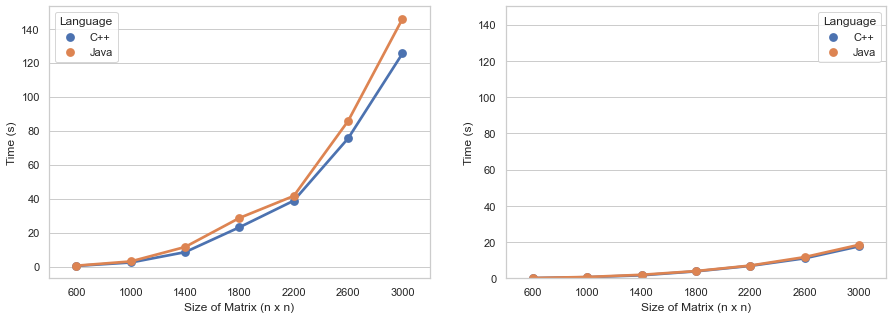

In [66]:
# display both plots in the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(x="Dimensions", y="Time", hue="Language", data=ex1, ax=ax1)
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("Size of Matrix (n x n)")

sns.pointplot(x="Dimensions", y="Time", hue="Language", data=ex2a, ax=ax2)
ax2.set_ylabel("Time (s)")
ax2.set_xlabel("Size of Matrix (n x n)")
ax2.set_ylim(0, 150)

plt.savefig("plots/ex1-ex2a-overall.png", dpi=300)

plt.show()

In [25]:
ex3_4096 = pd.read_csv("metrics/ex3/ex3-4096.csv")
ex3_6144 = pd.read_csv("metrics/ex3/ex3-6144.csv")
ex3_8192 = pd.read_csv("metrics/ex3/ex3-8192.csv")
ex3_10240 = pd.read_csv("metrics/ex3/ex3-10240.csv")


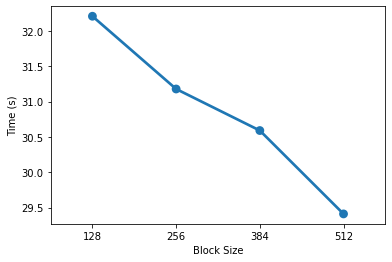

In [31]:
# plot the time taken, by block size, for the 4096x4096 matrix
sns.pointplot(x="Block Size", y="Time (s)", data=ex3_4096)
plt.ylabel("Time (s)")
plt.xlabel("Block Size")
plt.savefig("plots/ex3/ex3-4096.png", dpi=300)
plt.show()

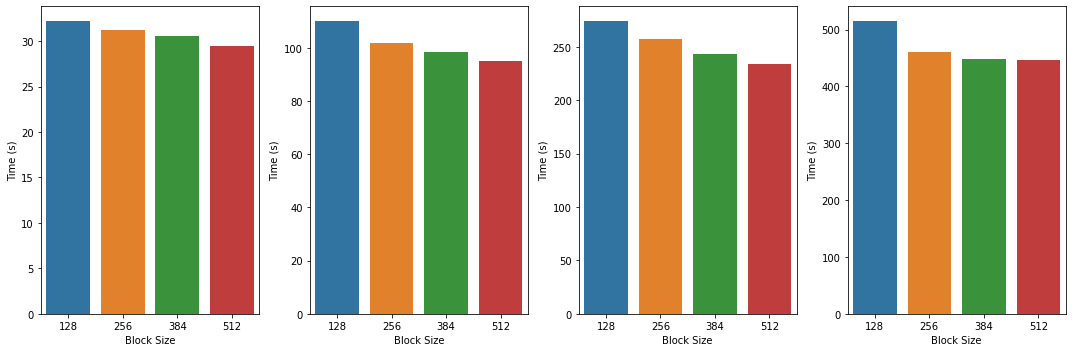

In [33]:
# Given the 4 df aboves, plot a horizontal bar chart for each of them, with the block size on the x axis and the time on the y axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

sns.barplot(x="Block Size", y="Time (s)", data=ex3_4096, ax=ax1)
ax1.set_ylabel("Time (s)")
ax1.set_xlabel("Block Size")

sns.barplot(x="Block Size", y="Time (s)", data=ex3_6144, ax=ax2)
ax2.set_ylabel("Time (s)")
ax2.set_xlabel("Block Size")

sns.barplot(x="Block Size", y="Time (s)", data=ex3_8192, ax=ax3)
ax3.set_ylabel("Time (s)")
ax3.set_xlabel("Block Size")

sns.barplot(x="Block Size", y="Time (s)", data=ex3_10240, ax=ax4)
ax4.set_ylabel("Time (s)")
ax4.set_xlabel("Block Size")

# make the plots look nicer
plt.tight_layout()


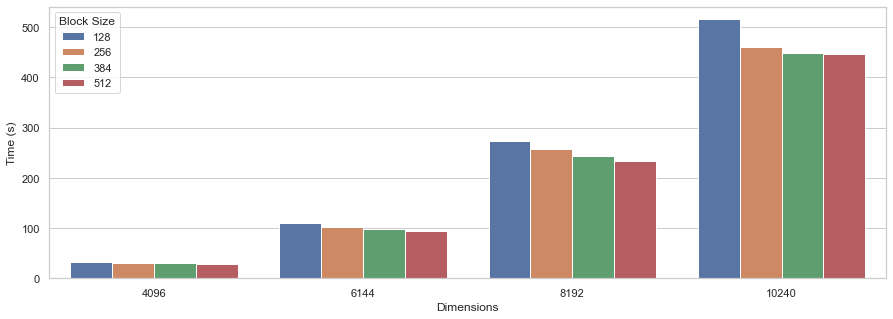

In [48]:
# do the same as above, but group by the dimensions and not by the block size
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="Dimensions", y="Time (s)", hue="Block Size", data=pd.concat([ex3_4096, ex3_6144, ex3_8192, ex3_10240]))
ax.set_ylabel("Time (s)")
ax.set_xlabel("Dimensions")
    

plt.savefig("plots/ex3/ex3-overall.png", dpi=300)

plt.show()

# can you make it horizontal? like bars from left to right, instead of from bottom to top?



In [49]:
# get the best run for each matrix size, which is the one with block size 512
ex3_4096_best = ex3_4096[ex3_4096["Block Size"] == 512]
ex3_6144_best = ex3_6144[ex3_6144["Block Size"] == 512]
ex3_8192_best = ex3_8192[ex3_8192["Block Size"] == 512]
ex3_10240_best = ex3_10240[ex3_10240["Block Size"] == 512]

# create a df with these rows
ex3_best = pd.concat([ex3_4096_best, ex3_6144_best, ex3_8192_best, ex3_10240_best])

# drop the block size column
ex3_best = ex3_best.drop(columns=["Block Size"])

In [53]:
ex3_best

,Dimensions,Block Size,Language,Time (s)
3,4096,512,C++,29.4104
3,6144,512,C++,95.0939
3,8192,512,C++,234.1270
3,10240,512,C++,446.7920


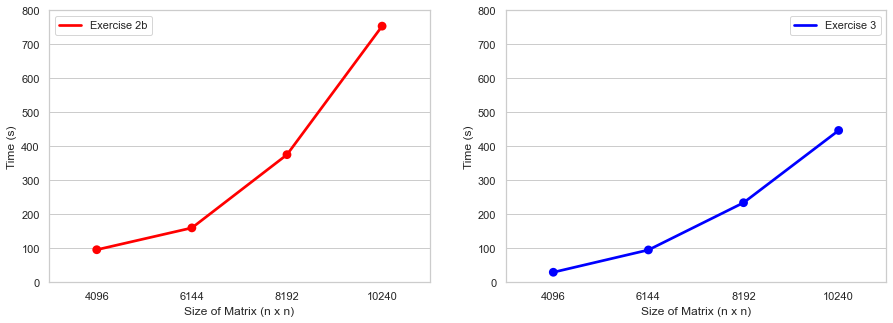

In [75]:
# plot it against the ex2b, in the same figure
# display both plots in the same figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.pointplot(x="Dimensions", y="Time", data=ex2b, ax=ax1, color="red")
ax1.legend(["Exercise 2b"])
ax1.set_ylabel("Time (s)")
ax1.set_ylim(0, 800)
ax1.set_xlabel("Size of Matrix (n x n)")

sns.pointplot(x="Dimensions", y="Time (s)", data=ex3_best, ax=ax2, color="blue")
ax2.legend(["Exercise 3"])
ax2.set_ylabel("Time (s)")
ax2.set_ylim(0, 800)
ax2.set_xlabel("Size of Matrix (n x n)")

plt.savefig("plots/ex2b-ex3-overall.png", dpi=300)

plt.show()



In [ ]:
## Counters
counters_ex1_600 = pd.read_csv("metrics/counters/ex1/ex1-600.csv")
counters_ex1_1000 = pd.read_csv("metrics/counters/ex1/ex1-1000.csv")
counters_ex1_1400 = pd.read_csv("metrics/counters/ex1/ex1-1400.csv")
counters_ex1_1800 = pd.read_csv("metrics/counters/ex1/ex1-1800.csv")
counters_ex1_2200 = pd.read_csv("metrics/counters/ex1/ex1-2200.csv")
counters_ex1_2600 = pd.read_csv("metrics/counters/ex1/ex1-2600.csv")
counters_ex1_3000 = pd.read_csv("metrics/counters/ex1/ex1-3000.csv")

counters_ex2_600 = pd.read_csv("metrics/counters/ex2/ex2-600.csv")
counters_ex2_1000 = pd.read_csv("metrics/counters/ex2/ex2-1000.csv")
counters_ex2_1400 = pd.read_csv("metrics/counters/ex2/ex2-1400.csv")
counters_ex2_1800 = pd.read_csv("metrics/counters/ex2/ex2-1800.csv")
counters_ex2_2200 = pd.read_csv("metrics/counters/ex2/ex2-2200.csv")
counters_ex2_2600 = pd.read_csv("metrics/counters/ex2/ex2-2600.csv")
counters_ex2_3000 = pd.read_csv("metrics/counters/ex2/ex2-3000.csv")

counters_ex3_600 = pd.read_csv("metrics/counters/ex3/ex3-600.csv")
counters_ex3_1000 = pd.read_csv("metrics/counters/ex3/ex3-1000.csv")
counters_ex3_1400 = pd.read_csv("metrics/counters/ex3/ex3-1400.csv")
counters_ex3_1800 = pd.read_csv("metrics/counters/ex3/ex3-1800.csv")
counters_ex3_2200 = pd.read_csv("metrics/counters/ex3/ex3-2200.csv")
counters_ex3_2600 = pd.read_csv("metrics/counters/ex3/ex3-2600.csv")
counters_ex3_3000 = pd.read_csv("metrics/counters/ex3/ex3-3000.csv")

# get only the following counters:
# PAPI_